<a href="https://colab.research.google.com/github/ESLAMYASSER-1/Pytorch_learning_Daniel_Bourke/blob/main/Second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [ ]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [41]:
X, y = make_circles(1000, noise =0.03, random_state=42)
X= torch.from_numpy(X).type(torch.float32)
y= torch.from_numpy(y).type(torch.float32)
len(X), len(y)

(1000, 1000)

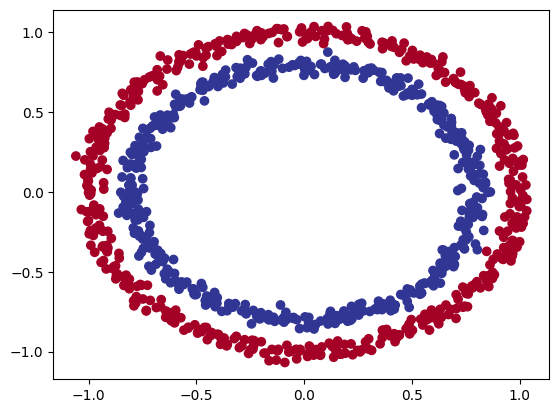

In [42]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap = plt.cm.RdYlBu)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
len(X_train), len(X_test)

(800, 200)

In [45]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [143]:
class BCModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(2,8)
    self.relu= nn.ReLU()
    self.l2 = nn.Linear(8,16)
    self.l3 = nn.Linear(16,32)
    self.l4 = nn.Linear(32,64)
    self.l5 = nn.Linear(64,128)
    self.l6 = nn.Linear(128,256)
    self.l7 = nn.Linear(256,512)
    self.l8 = nn.Linear(512,1)
    self.sig = nn.Sigmoid()
  def forward(self,X):
    out = self.relu(self.l1(X))
    out = self.relu(self.l2(out))
    out = self.relu(self.l3(out))
    out = self.relu(self.l4(out))
    out = self.relu(self.l5(out))
    out = self.relu(self.l6(out))
    out = self.relu(self.l7(out))
    out = self.sig(self.l8(out))
    return out

In [144]:
torch.manual_seed(42)
model_2 = BCModel().to(device)
model_2

BCModel(
  (l1): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=8, out_features=16, bias=True)
  (l3): Linear(in_features=16, out_features=32, bias=True)
  (l4): Linear(in_features=32, out_features=64, bias=True)
  (l5): Linear(in_features=64, out_features=128, bias=True)
  (l6): Linear(in_features=128, out_features=256, bias=True)
  (l7): Linear(in_features=256, out_features=512, bias=True)
  (l8): Linear(in_features=512, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [145]:
model_2.state_dict()

OrderedDict([('l1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]], device='cuda:0')),
             ('l1.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691],
                     device='cuda:0')),
             ('l2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.1118, -0.0062,  0.27

In [146]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(params= model_2.parameters(), lr=0.01)

In [148]:
with torch.inference_mode():
  pretrain_predictions = torch.round(model_2(X_test.to(device)))
pretrain_predictions[:10], y_test[:10]

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

In [149]:
from sklearn.metrics import accuracy_score

In [150]:
epochs= 100

X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)
epoch_count=[]
train_loss= []
test_loss= []
accuracy_count = []

for epoch in range(epochs):
  model_2.train()
  out = torch.round(model_2(X_train)).squeeze()
  # print(out[:10])
  acc= accuracy_score(y_train.cpu().detach(), out.cpu().detach())
  loss = criterion(y_train, out)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    out_test = torch.round(model_2(X_test)).squeeze()
    loss_test = criterion(y_test, out_test)
    test_acc= accuracy_score(y_test.cpu().detach(), out_test.cpu().detach())
    # print(out_test[:10])

    epoch_count.append(epoch)
    train_loss.append(loss.detach().item())
    test_loss.append(loss_test.detach().item())
    # accuracy_count.append(acc)
  if epoch %10 ==0:
    print(f"Epoch: {epoch} | Train Loss: {loss :.4f} | Test Loss: {loss_test} | Train Accuracy:{acc} | Test Accuracy: {test_acc}")


Epoch: 0 | Train Loss: 50.0000 | Test Loss: 50.0 | Train Accuracy:0.5 | Test Accuracy: 0.5
Epoch: 10 | Train Loss: 50.0000 | Test Loss: 50.0 | Train Accuracy:0.5 | Test Accuracy: 0.5
Epoch: 20 | Train Loss: 50.0000 | Test Loss: 50.0 | Train Accuracy:0.5 | Test Accuracy: 0.5
Epoch: 30 | Train Loss: 50.0000 | Test Loss: 50.0 | Train Accuracy:0.5 | Test Accuracy: 0.5
Epoch: 40 | Train Loss: 50.0000 | Test Loss: 50.0 | Train Accuracy:0.5 | Test Accuracy: 0.5
Epoch: 50 | Train Loss: 50.0000 | Test Loss: 50.0 | Train Accuracy:0.5 | Test Accuracy: 0.5
Epoch: 60 | Train Loss: 50.0000 | Test Loss: 50.0 | Train Accuracy:0.5 | Test Accuracy: 0.5
Epoch: 70 | Train Loss: 50.0000 | Test Loss: 50.0 | Train Accuracy:0.5 | Test Accuracy: 0.5
Epoch: 80 | Train Loss: 50.0000 | Test Loss: 50.0 | Train Accuracy:0.5 | Test Accuracy: 0.5
Epoch: 90 | Train Loss: 50.0000 | Test Loss: 50.0 | Train Accuracy:0.5 | Test Accuracy: 0.5


In [139]:
y_train[:10]

tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0.], device='cuda:0')

In [141]:
with torch.inference_mode():
  pred = model_2(X_test.to(device))
pred[:10], y_test[:10]

(tensor([[0.4922],
         [0.4923],
         [0.4922],
         [0.4922],
         [0.4923],
         [0.4924],
         [0.4926],
         [0.4927],
         [0.4922],
         [0.4924]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))